# KNN(K-Nearest Neighbor)

* * *

## 1. 정의

- 비교 대상이 되는 데이터 포인트 주변에 가장 가까이 존재하는 k개의 데이터를 선정하고, 선정된 데이터 중 다수인 데이터로 판별하게 되는 알고리즘이다.
- 데이터를 분류하는 데 KNN을 k=3으로 설정하여 사용한다면 데이터 포인트에서 가장 가까운 데이터 3개와 비교한 후 테스트 데이터를 판별하게 된다.

>예시
과일의 특징에 따라 과일 종류를 KNN을 k=3으로 설정 후 분류한다고 하자. 테스트 데이터 주변의 가장 가까운 데이터 3개가 포도2개 레몬 1개로 구성되어 있다면, 포도가 테스트 데이터 주변에 가장 많이 존재함을 의미하므로 테스트 데이터를 포도라고 분류하게 된다.

- 타겟값이 연속형이라면 주변 k개에 존재하는 데이터의 평균값으로 예측하는 방법을 사용한다.

>예시
과일의 당도를 예측할 때 KNN에 k=3인 모델로 예측한다고 하자. 그때 테스트 데이터 주변에 당도가 8, 10, 12인 값이 있다면, 테스트 데이터는 (8+10+12)/3 = 10이 된다.

## 2. 장단점

1. 장점
- 비선형 데이터의 문제 해결에 유용할 수 있다.
    - 이미지 인식
    - 추천 알고리즘
    - 패턴 인식
    - ...
- 수치 기반의 데이터가 주어질 때 성능이 우수하다.

2. 단점
- 예측을 할 때마다 전체 데이터와의 거리를 계산해야 하기 때문에 예측 단계의 속도가 느리다.
- KNN은 데이터 포인트 사이의 유클리드 거리를 사용하여 가장 가까운 이웃을 찾기 때문에 데이터 스케일링이 필수이다.
    - 거리 측정 지표인 유클리드 거리는 값이 큰 피처를 값이 작은 피처보다 가중치가 더 크기 때문이다. (=값의 크기에 민감하게 반응하기 떄문이다.)
- 특성값 대부분이 0인 데이터셋(희소행렬)에는 잘 작동하지 않는다.

## 3. 거리 측정 지표

KNN은 거리 측정 방법에 따라 그 결과가 크게 달라지는 알고리즘이다.

1. Minkowski 거리
- 유클리드 거리와 맨해튼 거리를 일반화한 거리 측정 지표
- $\left(\displaystyle\sum_{i=1}^{n} \vert {x_i - y_i} \vert^p \right)^{1/p}$ , ($i$ = 각 벡터의 $i^{번째}$ 요소, $x, y$ = 거리를 계산할 데이터 객체, $p$ = 1 또는 2의 정수)
- p=1이면 맨해튼 거리, p=2이면 유클리드 거리를 계산하는 것과 같다.
- 사이킷런에서는 p=2가 디폴트로 설정되어 있어 유클리드 거리를 거리 측정 지표로 사용하고 있다.

2. Euclidean 거리
- 유클리디안 거리라고 부르기도 한다.
- n 차원에서 두 점 사이의 거리를 구할 때, 각 차원의 차를 제곱해서 모두 더한 값에 제곱근을 취해 거리를 계산한다.
- 값을 정규화하지 않으면 편차가 제곱되기 때문에 특정 차원이 거리값에 큰 영향을 끼칠 수 있다.
- 따라서, `저차원의 데이터`에 사용한다.
- $\displaystyle\sqrt{\sum_{i=1}^{n} ({x_i - y_i})^2}$, ($i$ = 각 벡터의 $i^{번째}$ 요소, $x, y$ = 거리를 계산할 데이터 객체)

3. Manhattan 거리<br>
- 유클리드 거리처럼 각 차원의 차를 제곱해서 사용하는 것이 아니라 절댓값을 바로 합산하여 계산한다.
- 제곱을 하지 않기 때문에 차원의 영향력을 줄일 수 있다.
- 따라서 `고차원의 데이터`가 있을 때 사용하면, 유클리드 거리 측정 방법보다 특정 차원의 영향력을 줄일 수 있다.
- $\displaystyle\sum_{i=1}^{n} \vert {x_i - y_i}\vert$, ($i$ = 각 벡터의 $i^{번째}$ 요소, $x, y$ = 거리를 계산할 데이터 객체)

### 3.1. 거리 측정 지표 구현해보기

In [2]:
def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

def manhattan_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += abs(pt1[i] - pt2[i])
  return distance

print(f"[5, 4, 3], [1, 7, 9] 유클리드 거리 계산 결과: {euclidean_distance([5, 4, 3], [1, 7, 9])}")
print(f"[5, 4, 3], [1, 7, 9] 맨해튼 거리 계산 결과: {manhattan_distance([5, 4, 3], [1, 7, 9])}")

[5, 4, 3], [1, 7, 9] 유클리드 거리 계산 결과: 7.810249675906654
[5, 4, 3], [1, 7, 9] 맨해튼 거리 계산 결과: 13


## 4. 실습

### 4.1. Iris 데이터를 활용해서 KNN 실습하기

#### 4.1.1. 데이터 불러오기

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

#### 4.1.2. 피처, 타겟 데이터 지정

In [4]:
import pandas as pd

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

In [5]:
X = df.drop('target', axis=1)
y = df['target']

#### 4.1.3. 데이터 표준화

In [6]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

#### 4.1.4. 트레이닝/테스트 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

#### 4.1.5. 데이터 학습

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3) # 데이터 포인트와 근접한 3개의 데이터를 비교하여 분류
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 4.1.6. 데이터 예측

In [10]:
knn_pred = knn_clf.predict(X_test)
print(knn_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


#### 4.1.7. 정확도 평가

In [11]:
from sklearn.metrics import accuracy_score

print(f"KNN, k=3인 모델의 테스트 데이터셋 정확도: {accuracy_score(y_test, knn_pred)}")

KNN, k=3인 모델의 테스트 데이터셋 정확도: 1.0


#### 4.1.8. confusion matrix 확인

In [12]:
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print(knn_confusion_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


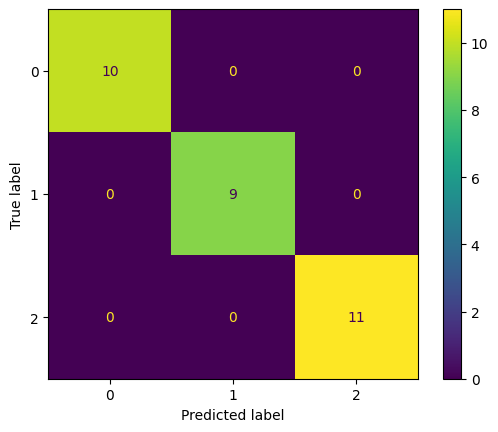

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, knn_pred, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn_clf.classes_)
disp.plot();

#### 4.1.9. 예측 결과 확인

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f"정확도: {accuracy_score(y_test, knn_pred)}")
print(f"정밀도: {recall_score(y_test, knn_pred, average='macro')}")
print(f"재현율: {precision_score(y_test, knn_pred, average='macro')}")
print(f"F1 Score: {f1_score(y_test, knn_pred, average='macro')}")

정확도: 1.0
정밀도: 1.0
재현율: 1.0
F1 Score: 1.0


1) Precision = 정밀도

- 양성 클래스라고 예측한 샘플(TP+FP) 중 실제로 양성 클래스에 속하는 샘플(TP) 샘플 수의 비율.
- 높을수록 좋다. '예측값'을 기준으로 한 '정답인 예측값'의 비율로 생각하면 쉽다.
- $precision=\displaystyle\frac{TP}{TP\ +\ FP}$

2) Recall = 재현율
- 실제 양성 클래스에 속한 샘플(TP+FN) 중 양성 클래스라고 예측한 샘플(TP) 샘플 수의 비율.
- 역시 높을수록 좋다. '실제 값'을 기준으로 한 '정답인 예측값'의 비율로 생각하면 쉽다.
- $recall=\displaystyle\frac{TP}{TP+FN}$
​

3) Accuracy = 정확도
- 전체 샘플 중 맞게 예측한 샘플 수의 비율. 역시 높을수록 좋다.
- $accuracy=\displaystyle\frac{TP+TN}{TN+TP+FN+FP}$
​
4) F1-score
- precision과 recall의 가중 조화평균(weight harmonic average)을 F-score라 한다.
- $\displaystyle{F_\beta}=(1+\beta^2)(precision \times recall)/({β^2}precision+recall)$
- 이때 정밀도에 주어지는 가중치를 $\beta$라고 하는데 이 $\beta$가 1인 경우를 F1-score라고 한다.
- $\displaystyle{F_1}=(1+\beta^2)(precision \times recall)/({1^2}precision+recall)$
- $\displaystyle{F_1}=(2)(precision \times recall)/(precision+recall)$

5) macro avg 
- 샘플 개수의 불균형을 고려하지 않는다.
- f1-macro-avg를 예로 들면 0부터 2까지 라벨의 f1-score 3개를 모두 더한 뒤 3을 나누면 된다.
- (1.0 + 1.0 + 1.0) / 3 = 1.0
- 샘플 개수의 불균형을 고려하지 않기 때문에 소수 클래스에 대한 성능이 낮을 때 더 큰 페널티가 발생한다. (데이터가 불균형할 때 확인해보자)

### 4.2. KNN 최적화

- KNN은 k의 값에 따라 결과가 달라진다.
- 따라서 k의 적절한 값을 찾는 것이 KNN 모델 최적화의 핵심이다.

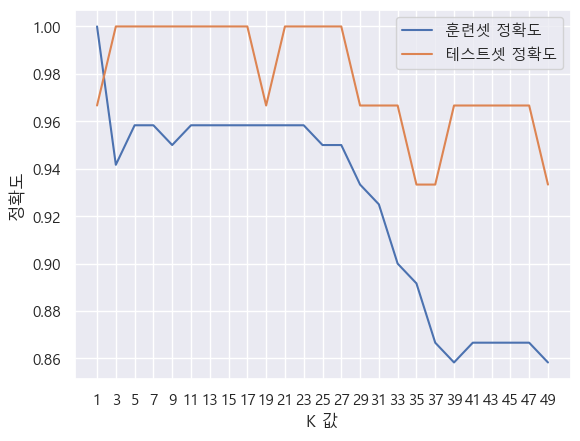

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")

training_accuracy = []
test_accuracy = []

# 1~50 범위에서 최적의 K값 찾기
for k in range(1, 50, 2):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    training_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))

plt.plot(range(1, 50, 2), training_accuracy, label='훈련셋 정확도')
plt.plot(range(1, 50, 2), test_accuracy, label='테스트셋 정확도')
plt.xticks(range(1, 50, 2))
plt.ylabel("정확도")
plt.xlabel("K 값")
plt.legend()
plt.show()

- 훈련셋과 테스트셋의 과대적합이 발생하지 않는 지점인 k=19 일 때 가장 좋은 성능을 보이는 것을 확인할 수 있다.

## 5. KNN의 하이퍼 파라미터

```python
1. n_neighbors: 임의의 정수, 디폴트=5
    - KNN에서 사용할 K 값

2. weights: {'uniform', 'distance'} 또는 UDF, 디폴트='uniform'
    - K개의 가까운 데이터를 찾고, 그 중에서 어떤 것으로 분류할지 정할 때 부여하는 가중치
        - 'uniform': 모든 데이터에 동일한 가중치를 부여한다. 
            - 사실상 부여하지 않는다는 의미
        - 'distance': 각 데이터에 거리의 역수를 부여한다.
            - 거리가 가까울 수록 큰 가중치를 부여받음
            - 'distance'로 사용하는 경우 k=3 일 때, 두 개는 A, 나머지 하나는 B 이면서 B가 가장 가깝다고 하면
            - A가 더 많음에도 불구하고 B가 가장 높은 가중치를 받아 데이터를 B로 분류할 수도 있다.
        - UDF: 가중치를 부여할 사용자지정함수

3. algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, 디폴트='auto'
    - 가장 가까운 거리에 위치한 k개의 데이터를 찾기 위해 데이터를 탐색하는 방법
        - 'auto': 현재 데이터에 가장 적절한 탐색 방법을 선택
        - 'brute': 처음부터 끝까지 모든 경우의 수를 대입하여 수행
        - 'kd_tree': 무차별 대입 방식의 계산 비효율성을 해결하기 위해 발명된 트리 기반 데이터 구조
            - 저차원 데이터에 대해서만 빠름
            - K가 지나치게 클 경우 불균형해짐
        - 'ball_tree': KD-tree보다 성능이 뛰어남
            - 고차원 데이터에 효율적

4. leaf_size: 임의의 정수, 디폴트=30
    - algorithm 파라미터로 'ball_tree', 'kd_tree'를 사용할 경우 제한할 노드 수

5. p: 임의의 정수, 디폴트=2
    - 거리 측정 함수를 어떤 것을 사용할 것인지 정하는 임의의 정수
        - p=1: 맨해튼 거리
        - p=2: 유클리드 거리

6. metric: {'minkowski', 'euclidean', 'manhattan'} 또는 UDF, 디폴트='minkowski'
    - 거리 측정 지표로 사용할 방법
    - 사용자 지정 함수도 사용할 수 있다.

7. metric_params: 딕셔너리, 디폴트=None
    - 거리 측정 지표를 사용자 지정 함수로 사용하며, 사용자 지정 함수에 파라미터가 필요한 경우 지정함

8. n_jobs: None 또는 -1, 디폴트=None
    - CPU Processor의 사용 정도를 지정
        - -1 로 지정하면 할당가능한 모든 CPU 자원을 사용하여 학습/예측함
```

# Reference
[1] [scikit-learn document](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[2] [scikit-learn tutorial](https://www.tutorialspoint.com/scikit_learn/scikit_learn_k_nearest_neighbors.htm)

[3] [파이썬 라이브러리를 활용한 머신러닝](https://product.kyobobook.co.kr/detail/S000001810484)

[4] [유클리안 거리, 맨해튼 거리](https://velog.io/@gandi0330/NLP-Distance-Function-%EA%B0%9C%EB%85%90)